# Mobile Net For Image Classification

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.10.1


## 1. Load Fashion Mnist Data

In [2]:
# Load the raw Fashion-MNIST data.
train, val = tf.keras.datasets.fashion_mnist.load_data()

X_train_raw, y_train = train
X_val_raw, y_val = val

X_train = X_train_raw.reshape((X_train_raw.shape[0], X_train_raw.shape[1]**2))
X_val = X_val_raw.reshape((X_val_raw.shape[0], X_val_raw.shape[1]**2))

#Consider a subset of 2500 samples of the 60000 total images (indexed 10000 ~ 12500)
X_val = X_train[10000:10500,:]
y_val = y_train[10000:10500]
X_train = X_train[10500:12500,:]
y_train = y_train[10500:12500]

mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_val = X_val.astype(np.float32) - mean_image

# We have vectorized the data for you. That is, we flatten the 32×32×3 images into 1×3072 Numpy arrays.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

Training data shape:  (2000, 784)
Training labels shape:  (2000,)
Validation data shape:  (500, 784)
Validation labels shape:  (500,)


## 2. Visualization

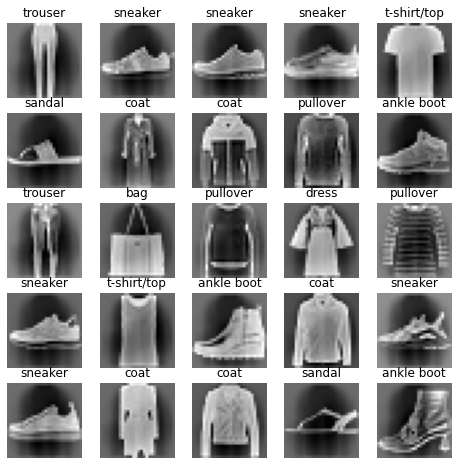

In [3]:
label_map = [
    't-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
]

X = X_train.reshape(X_train.shape[0], X_train_raw.shape[1], X_train_raw.shape[2])

fig, axes1 = plt.subplots(5, 5, figsize=(8, 8))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0], cmap='gray')
        axes1[j][k].set_title(label_map[y_train[i]])

## 3. Basic CNN

In [4]:
from utils.neuralnets.mlp import MLP 
from utils.optimizers import AdamOptim

In [19]:
# Build a two-layer network without batch normalization.

from utils.optimizers import AdamOptim

model = MLP(input_dim=X_train.shape[1], hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = AdamOptim(model)
hist_adam = optimizer.train(model, X_train, y_train, X_val, y_val, 
                            num_epoch=15, batch_size=200, learning_rate=1e-3, 
                            learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.22, new learning rate = 0.00095
epoch 2: valid acc = 0.254, new learning rate = 0.0009025
epoch 3: valid acc = 0.288, new learning rate = 0.000857375
epoch 4: valid acc = 0.394, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.482, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.59, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.632, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.666, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.642, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.716, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.73, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.72, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.682, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.752, new learning rate = 0.00048767497911552944
epoch 15: valid acc 